# MGT-499 Statistics and Data Science - Individual Assignment

In [112]:
# Import here what you need
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sns
import os 

This notebook contains the individual assignment for the class MGT-499 Statistics and Data Science. Important information:
- **Content**: the assignment is divided in two main parts, namely data cleaning (2 datasets) and Exploratory Data Analysis, for a total of 13 main questions (see table of contents). Some of these main questions are divided in sub questions. In the first part, the questions are very specific, while in the second part they are more open.
- **Deadline**: Tuesday 8th of November at 23:59. 
- **Final Output**: a Jupyter notebook, which we (teachers) can run. 
- **Answering the Questions**: you will find the questions in markdown cells below. Under each of these cells, you will find a cell / cells for answers. Type there your answer. For the answer to be correct, the cell with the answer must run without error (unless specified). You can use markdown cells for the answers that require text.
- **Submission**: submit the assignment on Moodle, under [Individual Assignment](https://moodle.epfl.ch/mod/assign/view.php?id=1222846)

## Content
- [Polity5 Dataset](#polity5)  
    - [Question 1: Import the data and get a first glance](#question1)
    - [Question 2: Select some variables](#question2)
    - [Question 3: Missing Values](#question3)
    - [Question 4: Check Polity2](#question4)
- [Quality of Government (QOG) Environmental Indicators Dataset](#qog)  
    - [Question 5: Import the data and do few fixes](#question5)
    - [Question 6: Merge QOG and Polity5 ... first attempt](#question6)
    - [Question 7: Merge QOG and Polity5 ... second attempt](#question7)
    - [Question 8: Clean the merged dataframe](#question8)
- [Exploratory Data Analysis](#eda)
    - [Question 9: Selecting the ingredients for the recipe (how I select the variables)](#question9)  
    - [Question 10: Picking the right quantity of each ingredient (how I select my sample)](#question10)
    - [Question 11: Tasting and preparing the ingredients (univariate analysis)](#question11)
    - [Question 12: Cooking the ingredients together (bivariate analysis)](#question12)
    - [Question 13: Tasting the new recipe (conclusion)](#question13)

## Polity5 data <a class="anchor" id="polity5"></a>

Polity5 is a widely used democracy scale. The raw data as well as the codebook are available [here](http://www.systemicpeace.org/inscrdata.html). For this assignment, we have modified a bit the original version, for example we have added the iso3 code for countries to make you save time. You can find the modified version [here](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/data/polity2_iso3.csv).

### Question 1: import the data and get a first glance <a class="anchor" id="question1"></a>

1a) Import the csv 'polity2_iso3.csv' (file provided in the link [here](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/data/polity2_iso3.csv)) as a panda dataframe (ignore the warning message) **(1 point)**

In [2]:
# Answer 1a


url = "https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/data/polity2_iso3.csv"

df = pd.read_csv(url)

/var/folders/cc/czpkhzl97cs9wqllnm6rjkrh0000gn/T/ipykernel_2661/1416980099.py:6: DtypeWarning: Columns (13,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


1b) Display the first 10 rows **(1 point)**

In [3]:
# Answer 1b
df.loc[0:9]

,iso3,year,p5,cyear,ccode,scode,country,flag,fragment,democ,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,NaN,1800,0,2711800,271,WRT,Wuerttemburg,0,NaN,0,...,NaN,1.0,1.0,1800.0,1.0,-7.0,88.0,1.0,NaN,NaN
1,NaN,1800,0,7301800,730,KOR,Korea,0,NaN,5,...,NaN,1.0,1.0,1800.0,1.0,1.0,88.0,1.0,NaN,NaN
2,NaN,1800,0,2451800,245,BAV,Bavaria,0,NaN,0,...,NaN,1.0,1.0,1800.0,1.0,-10.0,88.0,1.0,NaN,NaN
3,NaN,1801,0,7301801,730,KOR,Korea,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1801,0,2711801,271,WRT,Wuerttemburg,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1801,0,2451801,245,BAV,Bavaria,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1802,0,7301802,730,KOR,Korea,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1802,0,2711802,271,WRT,Wuerttemburg,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1802,0,2451802,245,BAV,Bavaria,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1803,0,7301803,730,KOR,Korea,0,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1c) Display the data types of all the variables included in the data **(1 point)**

In [4]:
# Answer 1c
df.dtypes

iso3         object
year          int64
p5            int64
cyear         int64
ccode         int64
scode        object
country      object
flag          int64
fragment    float64
democ         int64
autoc         int64
polity        int64
polity2     float64
durable      object
xrreg         int64
xrcomp        int64
xropen        int64
xconst        int64
parreg        int64
parcomp       int64
exrec       float64
exconst       int64
polcomp     float64
prior        object
emonth       object
eday         object
eyear        object
eprec        object
interim      object
bmonth       object
bday         object
byear        object
bprec        object
post         object
change       object
d5           object
sf           object
regtrans     object
dtype: object

1d) By looking at your answer in 1c, what is the difference between the different types of variables? Why the type of some variables is defined as object? **(1 point)**

Some variables are strings and thus defined as object.



### Question 2. Select some variables <a class="anchor" id="question2"></a>

2a) Create a subset dataframe that contains the variables 'iso3', 'country', 'year', 'polity2' and display it **(1 point)**

In [5]:
# Answer 2a
subdf = df.loc[0:,('iso3','country','year','polity2')]
display(subdf)

,iso3,country,year,polity2
0,NaN,Wuerttemburg,1800,-7.0
1,NaN,Korea,1800,1.0
2,NaN,Bavaria,1800,-10.0
3,NaN,Korea,1801,1.0
4,NaN,Wuerttemburg,1801,-7.0
...,...,...,...,...
17569,ZWE,Zimbabwe,2014,4.0
17570,ZWE,Zimbabwe,2015,4.0
17571,ZWE,Zimbabwe,2016,4.0
17572,ZWE,Zimbabwe,2017,4.0


2b) Display the type of the variable "year" **(1 point)**

In [6]:
# Answer 2b
subdf.year.dtype


dtype('int64')

2c) Convert the variable "year" to string **(1 point)**
<br>
Hint: if you get a warning message of the type "SettingWithCopyWarning", it is because you did not subset the data in the right way. Go back to your class notes and check the different ways to subset a dataframe, and try again. If you do it correctly, you will not get the warning message.

In [7]:
# Answer 2c
subdf['year'] = subdf['year'].apply(str)
subdf.dtypes

iso3        object
country     object
year        object
polity2    float64
dtype: object

### Question 3: Missing Values <a class="anchor" id="question3"></a>

3a) Subset the rows that have iso3 missing and display **(1 point)**

In [8]:
# Answer 3a

df_missing = subdf[subdf['iso3'].isna() == True]

df_missing

,iso3,country,year,polity2
0,NaN,Wuerttemburg,1800,-7.0
1,NaN,Korea,1800,1.0
2,NaN,Bavaria,1800,-10.0
3,NaN,Korea,1801,1.0
4,NaN,Wuerttemburg,1801,-7.0
...,...,...,...,...
1272,NaN,Montenegro,2018,9.0
1273,NaN,Sudan-North,2018,-4.0
1274,NaN,Vietnam,2018,-7.0
1275,NaN,Ethiopia,2018,1.0


3b) Display the countries that have missing iso3. What can you tell by looking at them? Any similarities? **(1 point)**

In [9]:
# Answer 3b We can say that the majority of these "countries" are no more countries nowadays. 
# Some of them separated into 2 different countries (Serbia and Montenegro) and others reunited (Germany)

df_missing['country'].unique()


array(['Wuerttemburg', 'Korea', 'Bavaria', 'Saxony', 'Parma', 'Tuscany',
       'Sardinia', 'Modena', 'Two Sicilies', 'Baden', 'Gran Colombia',
       'United Province CA', 'Serbia', 'Orange Free State', 'Yemen North',
       'Czechoslovakia', 'USSR', 'Germany West', 'Germany East',
       'Pakistan', 'South Vietnam', 'Yemen South', 'Vietnam',
       'Yugoslavia', 'Ethiopia', 'Serbia and Montenegro', 'Montenegro',
       'Sudan-North'], dtype=object)

3c) Display the countries with missing iso3 from 2011. **(1 point)**

In [10]:
# Answer 3c

df_missing.loc[(df_missing['year'] > '2010')]['country'].unique()


array(['Montenegro', 'Serbia', 'Ethiopia', 'Sudan-North', 'Vietnam'],
      dtype=object)

3d) Display the rows for which the column "country" contains the word "Serbia". By looking at the result, can you tell what happened to Serbia in 2006? **(1 point)**
<br>
Hint: the most general way of doing this is to use a combination of re.search and list comprehension. To display the full subset, you can use print(df.to_string()).

In [11]:
# Answer 3d : In 2006 took place the referendum on the independence of Montenegro and thus its separation with Serbia

df_Serbia = subdf.loc[subdf['country'].str.contains('Serbia', regex=False)]
print(df_Serbia.to_string())






     iso3                country  year  polity2
224   NaN                 Serbia  1830     -7.0
230   NaN                 Serbia  1831     -7.0
252   NaN                 Serbia  1832     -7.0
261   NaN                 Serbia  1833     -7.0
272   NaN                 Serbia  1834     -7.0
286   NaN                 Serbia  1835     -7.0
295   NaN                 Serbia  1836     -7.0
301   NaN                 Serbia  1837     -7.0
318   NaN                 Serbia  1838      2.0
333   NaN                 Serbia  1839      2.0
344   NaN                 Serbia  1840      2.0
357   NaN                 Serbia  1841      2.0
363   NaN                 Serbia  1842      2.0
369   NaN                 Serbia  1843      2.0
387   NaN                 Serbia  1844      2.0
394   NaN                 Serbia  1845      2.0
410   NaN                 Serbia  1846      2.0
420   NaN                 Serbia  1847      2.0
429   NaN                 Serbia  1848      2.0
439   NaN                 Serbia  1849  

3e) Write a function that does the operation in 3d and use it to display the subset that has the word "sudan" (all lower cap) in country. Then do the same for the word "vietnam" (all lower cap). **(1 point)**
<br>
Hint: options of functions can be very useful.

In [12]:
# Answer 3e

def disp_country(name,df) : 
    df_country = df[df['country'].str.lower().str.contains(name, regex=False)]
    return(df_country.to_string())
    
print(disp_country('sudan',subdf))
print(disp_country('vietnam',subdf))

      iso3      country  year  polity2
1232   SSD  South Sudan  2011      0.0
1234   NaN  Sudan-North  2011     -4.0
1237   SSD  South Sudan  2012      0.0
1241   NaN  Sudan-North  2012     -4.0
1244   NaN  Sudan-North  2013     -4.0
1246   SSD  South Sudan  2013      0.0
1250   SSD  South Sudan  2014      0.0
1252   NaN  Sudan-North  2014     -4.0
1256   NaN  Sudan-North  2015     -4.0
1257   SSD  South Sudan  2015      0.0
1261   SSD  South Sudan  2016      0.0
1262   NaN  Sudan-North  2016     -4.0
1267   SSD  South Sudan  2017      0.0
1270   NaN  Sudan-North  2017     -4.0
1273   NaN  Sudan-North  2018     -4.0
1277   SSD  South Sudan  2018      0.0
14631  SDN        Sudan  1956      7.0
14632  SDN        Sudan  1957      7.0
14633  SDN        Sudan  1958     -7.0
14634  SDN        Sudan  1959     -7.0
14635  SDN        Sudan  1960     -7.0
14636  SDN        Sudan  1961     -7.0
14637  SDN        Sudan  1962     -7.0
14638  SDN        Sudan  1963     -4.0
14639  SDN        Sudan  

3f) Replace nan values in iso3 with correct iso3 for the 5 countries found in 3c from 2011 onwards, and display the subset with the fixed values to check that everything worked. **(1 point)**
<br>
Hint: the correct iso3 for these 5 countries are "ETH","MNE","SRB","SDN","VNM".

In [13]:
# Answer 3f


subdf.loc[(subdf['iso3'].isna() == True) 
          & (subdf['year'] > '2010') 
          & (subdf['country'].str.contains('Serbia', regex=False)),'iso3'] = 'SRB'

subdf.loc[(subdf['iso3'].isna() == True) 
          & (subdf['year'] > '2010') 
          & (subdf['country'].str.contains('Ethiopia', regex=False)),'iso3'] = 'ETH'

subdf.loc[(subdf['iso3'].isna() == True) 
          & (subdf['year'] > '2010') 
          & (subdf['country'].str.contains('Sudan', regex=False)),'iso3'] = 'SDN'

subdf.loc[(subdf['iso3'].isna() == True) 
          & (subdf['year'] > '2010') 
          & (subdf['country'].str.contains('Vietnam', regex=False)),'iso3'] = 'VNM'

subdf.loc[(subdf['iso3'].isna() == True) 
          & (subdf['year'] > '2010') 
          & (subdf['country'].str.contains('Montenegro', regex=False)),'iso3'] = 'MNE'



In [14]:
# We can see that NaN are replaced starting 2011 for iso3.

print(subdf.loc[subdf['country'].str.contains('Sudan', regex=False) |
                subdf['country'].str.contains('Serbia', regex=False) |
                subdf['country'].str.contains('Ethiopia', regex=False) |
                subdf['country'].str.contains('Montenegro', regex=False) |
                (subdf['country'].str.contains('Vietnam', regex=False))].to_string())

      iso3                country  year  polity2
224    NaN                 Serbia  1830     -7.0
230    NaN                 Serbia  1831     -7.0
252    NaN                 Serbia  1832     -7.0
261    NaN                 Serbia  1833     -7.0
272    NaN                 Serbia  1834     -7.0
286    NaN                 Serbia  1835     -7.0
295    NaN                 Serbia  1836     -7.0
301    NaN                 Serbia  1837     -7.0
318    NaN                 Serbia  1838      2.0
333    NaN                 Serbia  1839      2.0
344    NaN                 Serbia  1840      2.0
357    NaN                 Serbia  1841      2.0
363    NaN                 Serbia  1842      2.0
369    NaN                 Serbia  1843      2.0
387    NaN                 Serbia  1844      2.0
394    NaN                 Serbia  1845      2.0
410    NaN                 Serbia  1846      2.0
420    NaN                 Serbia  1847      2.0
429    NaN                 Serbia  1848      2.0
439    NaN          

3g) Drop the remaining rows which have nan in "iso3" and display the new number of rows of the dataframe (how many are they?) **(1 point)**

In [15]:
# Answer 3g
df_clean = subdf.dropna(subset='iso3')
df_clean


,iso3,country,year,polity2
1230,MNE,Montenegro,2011,9.0
1231,SRB,Serbia,2011,8.0
1232,SSD,South Sudan,2011,0.0
1233,ETH,Ethiopia,2011,-3.0
1234,SDN,Sudan-North,2011,-4.0
...,...,...,...,...
17569,ZWE,Zimbabwe,2014,4.0
17570,ZWE,Zimbabwe,2015,4.0
17571,ZWE,Zimbabwe,2016,4.0
17572,ZWE,Zimbabwe,2017,4.0


In [16]:
print('The number of rows is ', len(df_clean))

The number of rows is  16344


### Question 4: Check Polity2 <a class="anchor" id="question4"></a>

4a) Display the first and last year included in the dataset **(1 point)**

In [17]:
# Answer 4a
first_year = df_clean['year'].min()
display(subdf[subdf['year'] == first_year])
print('The first year is ', first_year)

last_year = df_clean['year'].max()
display(subdf[subdf['year'] == last_year])
print('The last year is ', last_year)


,iso3,country,year,polity2
16801,USA,United States,1776,0.0


The first year is  1776


,iso3,country,year,polity2
17045,USA,United States,2020,5.0


The last year is  2020


4b) What do the values in "polity2" represent? **(1 point)**

Answer 4b: A faire
The POLITY score is computed by subtracting the AUTOC score from the DEMOC score; the resulting unified polity scale ranges from +10 (strongly democratic) to -10 (strongly autocratic).
This variable is a modified version of the POLITY variable added in order to facilitate the use of the POLITY regime measure in time-series analyses. It modifies the combined annual POLITY score by applying a simple treatment, or ““fix,” to convert instances of “standardized authority scores” (i.e., -66, -77, and -88) to conventional polity scores (i.e., within the range, -10 to +10).

4c) Do we have weird values for polity2? If yes, why? What should we do about them? Transform the data accordingly. **(1 point)**

Answer 4c:

In [120]:
# Answer 4c
df_clean.polity2.unique()

# polity2 should be between -10 and 10 so we have extreme values : -88 and -66. These values are "normal" 
# since it represents particular cases (foreign “interruption”, “interregnum,” or anarchy and "transition"

array([  9.,   8.,   0.,  -3.,  -4.,  -7.,   1.,  -6.,  -8., -10.,  nan,
        -1.,  -2.,  -9.,  -5.,   3.,   5.,   7.,   2.,   6.,  10.,   4.,
       -88., -66.])

In [19]:
# Answer 4c Here, we drop rows with Nans in polity2

df_clean2 = df_clean.dropna(subset='polity2')
df_clean2.polity2.unique()

array([  9.,   8.,   0.,  -3.,  -4.,  -7.,   1.,  -6.,  -8., -10.,  -1.,
        -2.,  -9.,  -5.,   3.,   5.,   7.,   2.,   6.,  10.,   4., -88.,
       -66.])

In [20]:
# Answer 4c Here, we drop rows with values -88 and -66 in polity2

df_clean3 = df_clean2[(df_clean2['polity2'] != -88) & (df_clean2['polity2'] != -66)]

df_clean3.polity2.unique()




array([  9.,   8.,   0.,  -3.,  -4.,  -7.,   1.,  -6.,  -8., -10.,  -1.,
        -2.,  -9.,  -5.,   3.,   5.,   7.,   2.,   6.,  10.,   4.])

4d) Make a map that shows the number of observations of polity2 by country **(1 point)**

In [21]:
#We create a dataframe with a column that represents the number of observations we have for polity2 by country

df_number = df_clean2.groupby('country').size().reset_index(name='number')
df_number


,country,number
0,Afghanistan,196
1,Albania,105
2,Algeria,57
3,Angola,44
4,Argentina,194
...,...,...
169,Vietnam North,23
170,Yemen,29
171,Yugoslavia,71
172,Zambia,55


In [1]:
# Answer 4d

map_poly = px.choropleth(
    df_number,                                 # dataframe as argument
    locations="country",                       # column name with location
    locationmode="country names",                   # location method
    color="number",                       # color countries with altruism value
    color_continuous_scale=px.colors.sequential.Plasma,   # choice of colors
)
map_poly.update_layout( 
    title={                                # Add a title, centered on top
        'text': "Observations of polity2 by country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
map_poly.show()





NameError: name 'px' is not defined

4e) Store the final dataframe (the one you obtained after 4d) in an object called df_pol **(1 point)**

In [23]:
# Answer 4e
df_pol = df_clean3.reset_index(drop = True)
df_pol

,iso3,country,year,polity2
0,MNE,Montenegro,2011,9.0
1,SRB,Serbia,2011,8.0
2,SSD,South Sudan,2011,0.0
3,ETH,Ethiopia,2011,-3.0
4,SDN,Sudan-North,2011,-4.0
...,...,...,...,...
16101,ZWE,Zimbabwe,2014,4.0
16102,ZWE,Zimbabwe,2015,4.0
16103,ZWE,Zimbabwe,2016,4.0
16104,ZWE,Zimbabwe,2017,4.0


## Quality of Government Environmental Indicators <a class="anchor" id="qog"></a>

The QoG Environmental Indicators dataset (QoG-EI) (Povitkina, Marina, Natalia Alvarado Pachon & Cem Mert Dalli. 2021). The Quality of Government Environmental Indicators Dataset, version Sep21. University of Gothenburg: The Quality of Government Institute, https://www.gu.se/en/quality-government), is a compilation of indicators measuring countries' environmental performance over time, including the presence and stringency of environmental policies, environmental outcomes (emissions, deforestation, etc.), and public opinion on the environment. Codebook and data are available [here](https://www.gu.se/en/quality-government/qog-data/data-downloads/environmental-indicators-dataset).

### Question 5: Import the data and do few fixes <a class="anchor" id="question5"></a>

5a) Import data from the Quality of Government Environmental Indicators Dataset and display the variables types and the number of rows **(1 point)**
<br>
Hint: When you go on the webpage of the Environmental Indicators Dataset, you can directly import from a URL by copying the link address of the dataset! 

In [24]:
# Answer 5a
url = 'https://www.qogdata.pol.gu.se/data/qog_ei_sept21.csv'
df1 = pd.read_csv(url, encoding = 'latin-1')
df1.dtypes

Unnamed: 0      int64
cname          object
ccode         float64
year            int64
cname_qog      object
               ...   
wvs_epmip     float64
wvs_epmpp     float64
wvs_imeop     float64
wvs_pedp      float64
wvs_ploem     float64
Length: 415, dtype: object

In [25]:
rows = df1.shape[0]
print('The number of rows is' , rows)


The number of rows is 15225


5b) Rename the variable "ccodealp" to "iso3" **(1 point)**

In [26]:
# Answer 5b
df1.rename(columns={"ccodealp": "iso3"}, inplace = True)


5c) Check the type of the variables "year" and "iso3" are string, if not convert them to string **(1 point)**

In [27]:
# Answer 5c

print(df1.year.dtype)
print(df1.iso3.dtype)


int64
object


In [28]:
df1['year'] = df1['year'].apply(str)
print(df1.year.dtype)

object


### Question 6: Merge QOG and Polity5 ... issues with QOG? <a class="anchor" id="question6"></a>

6a) Get a subset of the dataframe that includes the variables "cname", "iso3", "year" and "cckp_temp", and display the number of rows. **(1 point)**

In [29]:
# Answer 6a - sub-dataframe

subdf1 = df1.loc[:,('cname','iso3','year','cckp_temp')]
subdf1



,cname,iso3,year,cckp_temp
0,Afghanistan,AFG,1946,13.158333
1,Afghanistan,AFG,1947,13.658333
2,Afghanistan,AFG,1948,12.925000
3,Afghanistan,AFG,1949,12.041667
4,Afghanistan,AFG,1950,11.583333
...,...,...,...,...
15220,South Vietnam,VDR,2016,NaN
15221,South Vietnam,VDR,2017,NaN
15222,South Vietnam,VDR,2018,NaN
15223,South Vietnam,VDR,2019,NaN


In [30]:
# Answer 6a - number of rows
rows = subdf1.shape[0]
print('The number of rows is' , rows)

The number of rows is 15225


6b) Merge this subset (left) and the clean version of the polity data (right), using the argument how="left". Was the merge succesfull? If yes, how many rows has the merged dataframe? Is it the same number of rows of the subset in 6a? **(1 point)**

In [121]:
# Answer 6b
df_merged = pd.merge(subdf1,df_pol, how = 'left')
df_merged

#We have more rows now, probably because we have duplicate observations in this new dataframe, i.e several iso3
# and year observations for the same country 

,cname,iso3,year,cckp_temp,country,polity2
0,Afghanistan,AFG,1946,13.158333,Afghanistan,-10.0
1,Afghanistan,AFG,1947,13.658333,Afghanistan,-10.0
2,Afghanistan,AFG,1948,12.925000,Afghanistan,-10.0
3,Afghanistan,AFG,1949,12.041667,Afghanistan,-10.0
4,Afghanistan,AFG,1950,11.583333,Afghanistan,-10.0
...,...,...,...,...,...,...
15145,South Vietnam,VDR,2016,NaN,NaN,NaN
15146,South Vietnam,VDR,2017,NaN,NaN,NaN
15147,South Vietnam,VDR,2018,NaN,NaN,NaN
15148,South Vietnam,VDR,2019,NaN,NaN,NaN


6c) Do the same by adding the argument validate="one-to-one". Can you make some hypotheses on why you get an error? **(1 point)**

In [32]:
# Answer 6c

df_merged1 = pd.merge(subdf1,df_clean2, how = 'left', validate='one-to-one')

# 1:1 check if merge keys are unique in both left and right datasets which is not the case here.


ValueError: Not a valid argument for validate

6d) Consider the subset of the QOG you obtained in 6a and write a code to (i) count the number of observations for the variable "cckp_temp" for each combination of iso3 and year, (ii) store the results in a dataframe. For example, the combination "USA-2012" should have 1 observation for "cckp_temp", so the result of your code should be 1. The code should do this for all iso3-year combinations of your subset dataframe, and store the results in a dataframe. **(1 point)**
<br>
Hint: it should not take you more than 2 lines of code.

In [33]:
# Answer 6d

df_obs = subdf1.groupby(['iso3','year']).size().reset_index(name ='counts')
df_obs


,iso3,year,counts
0,AFG,1946,1
1,AFG,1947,1
2,AFG,1948,1
3,AFG,1949,1
4,AFG,1950,1
...,...,...,...
15145,ZWE,2016,1
15146,ZWE,2017,1
15147,ZWE,2018,1
15148,ZWE,2019,1


In [34]:
df_obs[(df_obs['iso3'] == 'USA') & (df_obs['year'] == '2012') ]

,iso3,year,counts
14091,USA,2012,1


6e) Use the code in 6d to write a function that displays all rows of the dataframe obtained in 6a that have more than one observation of "
" for each iso3-year combination, and check if it works. **(1 point)**

In [35]:
# Answer 6e

def disp_rows(df):
    df_obs = df.groupby(['iso3','year']).size().reset_index(name = 'counts')
    return df[(df['iso3'].isin(df_obs[df_obs['counts'] > 1]['iso3']))]

df_test = disp_rows(subdf1)
df_test

,cname,iso3,year,cckp_temp
11834,Viet Nam,VNM,1946,NaN
11835,Viet Nam,VNM,1947,NaN
11836,Viet Nam,VNM,1948,NaN
11837,Viet Nam,VNM,1949,NaN
11838,Viet Nam,VNM,1950,NaN
...,...,...,...,...
15145,North Vietnam,VNM,2016,NaN
15146,North Vietnam,VNM,2017,NaN
15147,North Vietnam,VNM,2018,NaN
15148,North Vietnam,VNM,2019,NaN


6f) Which countries have more than one observation for each iso3-year combination? Deal with these countries in the subset dataframe created in 6a to make sure you no longer have double observations for iso3-year combinations, and check that after your fix this is actually the case. **(1 point)**
<br>
Hint: should we keep a country with all missing values?

In [36]:
# Answer 6f - Countries that have more than one observation

df_test.cname.unique()

array(['Viet Nam', 'North Vietnam'], dtype=object)

In [37]:
# Answer 6f - Here we can see that Vietnam (iso3 = VNM) is present twice in the dataframe, 
# once as "Viet Nam" and once as "North Vietnam" so we can drop rows such as cname = North Vietnam

print(df_test.to_string())

               cname iso3  year  cckp_temp
11834       Viet Nam  VNM  1946        NaN
11835       Viet Nam  VNM  1947        NaN
11836       Viet Nam  VNM  1948        NaN
11837       Viet Nam  VNM  1949        NaN
11838       Viet Nam  VNM  1950        NaN
11839       Viet Nam  VNM  1951        NaN
11840       Viet Nam  VNM  1952        NaN
11841       Viet Nam  VNM  1953        NaN
11842       Viet Nam  VNM  1954        NaN
11843       Viet Nam  VNM  1955        NaN
11844       Viet Nam  VNM  1956        NaN
11845       Viet Nam  VNM  1957        NaN
11846       Viet Nam  VNM  1958        NaN
11847       Viet Nam  VNM  1959        NaN
11848       Viet Nam  VNM  1960        NaN
11849       Viet Nam  VNM  1961        NaN
11850       Viet Nam  VNM  1962        NaN
11851       Viet Nam  VNM  1963        NaN
11852       Viet Nam  VNM  1964        NaN
11853       Viet Nam  VNM  1965        NaN
11854       Viet Nam  VNM  1966        NaN
11855       Viet Nam  VNM  1967        NaN
11856      

In [38]:
# Answer 6f - We drop the rows of the dataframe where cname = "North Vietnam" since there are only Nan for "cckp_temp"
subdf1.drop(subdf1[subdf1.cname == "North Vietnam"].index, inplace = True)
subdf1


,cname,iso3,year,cckp_temp
0,Afghanistan,AFG,1946,13.158333
1,Afghanistan,AFG,1947,13.658333
2,Afghanistan,AFG,1948,12.925000
3,Afghanistan,AFG,1949,12.041667
4,Afghanistan,AFG,1950,11.583333
...,...,...,...,...
15220,South Vietnam,VDR,2016,NaN
15221,South Vietnam,VDR,2017,NaN
15222,South Vietnam,VDR,2018,NaN
15223,South Vietnam,VDR,2019,NaN


In [39]:
# Answer 6f - We check that there is no more rows that have more than two observations
# for the variable "cckp_temp" for each combination of iso3 and year

disp_rows(subdf1)


,cname,iso3,year,cckp_temp


6g) If your check went well, now you can perform the same operation directly in the QOG dataframe (not in the substed dataframe created in 6a). How many rows does now the QOG dataframe has? **(1 point)**

In [40]:
# Answer 6g
df1.drop(df1[df1.cname == "North Vietnam"].index, inplace = True)
df1



,Unnamed: 0,cname,ccode,year,cname_qog,ccode_qog,iso3,ccodealp_year,ccodecow,ccodevdem,...,wdi_precip,wdi_tpa,wvs_ameop,wvs_ceom,wvs_deop,wvs_epmip,wvs_epmpp,wvs_imeop,wvs_pedp,wvs_ploem
0,1,Afghanistan,4.0,1946,Afghanistan,4,AFG,AFG46,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,4.0,1947,Afghanistan,4,AFG,AFG47,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Afghanistan,4.0,1948,Afghanistan,4,AFG,AFG48,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Afghanistan,4.0,1949,Afghanistan,4,AFG,AFG49,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Afghanistan,4.0,1950,Afghanistan,4,AFG,AFG50,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15220,15821,South Vietnam,NaN,2016,"Vietnam, South",999,VDR,VDR16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15221,15822,South Vietnam,NaN,2017,"Vietnam, South",999,VDR,VDR17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15222,15823,South Vietnam,NaN,2018,"Vietnam, South",999,VDR,VDR18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15223,15824,South Vietnam,NaN,2019,"Vietnam, South",999,VDR,VDR19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Answer 6g

rows = len(df1)
print('the new dataframe has', rows, 'rows')

the new dataframe has 15150 rows


### Question 7: Merge QOG and Polity5 ... issues with Polity5? <a class="anchor" id="question7"></a>

7a) Merge the cleaned QOG dataframe (left) and the Polity dataframe (right) using the options how="left" and validate="one_to_one". Does it work? Why? **(1 point)**

In [42]:
# Answer 7a It does not work because we have duplicates in the polity dataframe, we have more than one key representing the same observation


df_q_p = pd.merge(df1,df, how = 'left', validate = "one_to_one")
df_q_p


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

7b) Use the function you wrote in 6e to check what's wrong in the "clean" version of Polity **(1 point)**

In [43]:
# Answer 7b

def disp_rows(df):
    df_obs = df.groupby(['iso3','year'], as_index = False).size()
    return df_obs[df_obs['size'] > 1]

df_test1 = disp_rows(df_pol)

print(df_test1.to_string())

      iso3  year  size
9861   MNE  2011     2
9862   MNE  2012     2
9863   MNE  2013     2
9864   MNE  2014     2
9865   MNE  2015     2
9866   MNE  2016     2
9867   MNE  2017     2
9868   MNE  2018     2
13192  SDN  2011     2


In [44]:
# We observe what's wrong with rows that have iso3 equal to MNE and year greater or equal to 2011

df_pol[(df_pol['iso3'] == 'MNE') & (df_pol['year'] >= '2011') ]

,iso3,country,year,polity2
0,MNE,Montenegro,2011,9.0
6,MNE,Montenegro,2012,9.0
13,MNE,Montenegro,2013,9.0
21,MNE,Montenegro,2014,9.0
29,MNE,Montenegro,2015,9.0
30,MNE,Montenegro,2016,9.0
41,MNE,Montenegro,2017,9.0
42,MNE,Montenegro,2018,9.0
9901,MNE,Kosovo,2011,8.0
9902,MNE,Kosovo,2012,8.0


In [45]:
# We observe what's wrong with rows that have iso3 equal to SDN and year equal to 2011

df_pol[(df_pol['iso3'] == 'SDN') & (df_pol['year'] == '2011')]
#print(disp_country('sudan',df_pol))

,iso3,country,year,polity2
4,SDN,Sudan-North,2011,-4.0
13232,SDN,Sudan,2011,-2.0


7c) Drop or fix the countries that create troubles directly in the "clean" version of Polity and motivate your choices. **(1 point)**

In [46]:
# Answer 7c We drop the rows corresponding to Kosovo since it is no more a country
df_pol.drop(df_pol[df_pol.country == "Kosovo"].index, inplace = True)

# We also drop the row corresponding to Sudan in 2011 since there were a separation and it becomes Sudan-North. 

df_pol.drop(df_pol[(df_pol.country == "Sudan") & (df_pol.year == "2011") ].index, inplace = True)



In [47]:
print(df_pol[df_pol['country'] == 'Kosovo'])


Empty DataFrame
Columns: [iso3, country, year, polity2]
Index: []


In [48]:
print(df_pol[(df_pol['iso3'] == 'SDN') & (df_pol['year'] == '2011')])

  iso3      country  year  polity2
4  SDN  Sudan-North  2011     -4.0


7d) Try now to merge the "clean-clean" versions of COG and Polity (the ones you obtained in 7g and 8c) always using the options how="left" and validate="one_to_one". Does it work, and why? How many rows has the resulting merged dataframe? **(1 point)**

In [76]:
# Answer 7d It works now because we dropped the duplicates so the one_to_one merge can be made
df_final = pd.merge(df1,df_pol, how = 'left', validate = "one_to_one")



### Question 8: Clean the merged dataframe <a class="anchor" id="question8"></a>

8a) In the merged dataframe, order the columns so that you have the "index" variables first and the variables with actual values last. **(1 point)**
<br>
Hint: index variables are "iso3", "year" and other similar variables you can find, and the variables with actual values are "polity2", "cckp_temp" and other similar variables you can find.

In [77]:
# Answer 8a Index variables --> celles qui sont de type object ?

column = df_final.columns.to_list()     
column_first = ["cname", "iso3", "year", "country"] 
column_last = ["polity2", "cckp_temp" ]             

def get_columns(x, y, z): 
    
    list = [] 
    
    for column in x:
        if column not in y: 
            if column not in z:
                list += [column]
            
    return list

out = get_columns(column, column_first, column_last)
 

In [78]:
df_final_col = df_final.loc[:, column_first + out + column_last] 


,cname,iso3,year,country,Unnamed: 0,ccode,cname_qog,ccode_qog,ccodealp_year,ccodecow,...,wvs_ameop,wvs_ceom,wvs_deop,wvs_epmip,wvs_epmpp,wvs_imeop,wvs_pedp,wvs_ploem,polity2,cckp_temp
0,Afghanistan,AFG,1946,Afghanistan,1,4.0,Afghanistan,4,AFG46,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,13.158333
1,Afghanistan,AFG,1947,Afghanistan,2,4.0,Afghanistan,4,AFG47,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,13.658333
2,Afghanistan,AFG,1948,Afghanistan,3,4.0,Afghanistan,4,AFG48,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,12.925000
3,Afghanistan,AFG,1949,Afghanistan,4,4.0,Afghanistan,4,AFG49,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,12.041667
4,Afghanistan,AFG,1950,Afghanistan,5,4.0,Afghanistan,4,AFG50,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,11.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,South Vietnam,VDR,2016,NaN,15821,NaN,"Vietnam, South",999,VDR16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15146,South Vietnam,VDR,2017,NaN,15822,NaN,"Vietnam, South",999,VDR17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15147,South Vietnam,VDR,2018,NaN,15823,NaN,"Vietnam, South",999,VDR18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15148,South Vietnam,VDR,2019,NaN,15824,NaN,"Vietnam, South",999,VDR19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_final1 = df_final_col.drop(columns=['Unnamed: 0'])
df_final1

,cname,iso3,year,country,ccode,cname_qog,ccode_qog,ccodealp_year,ccodecow,ccodevdem,...,wvs_ameop,wvs_ceom,wvs_deop,wvs_epmip,wvs_epmpp,wvs_imeop,wvs_pedp,wvs_ploem,polity2,cckp_temp
0,Afghanistan,AFG,1946,Afghanistan,4.0,Afghanistan,4,AFG46,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,13.158333
1,Afghanistan,AFG,1947,Afghanistan,4.0,Afghanistan,4,AFG47,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,13.658333
2,Afghanistan,AFG,1948,Afghanistan,4.0,Afghanistan,4,AFG48,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,12.925000
3,Afghanistan,AFG,1949,Afghanistan,4.0,Afghanistan,4,AFG49,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,12.041667
4,Afghanistan,AFG,1950,Afghanistan,4.0,Afghanistan,4,AFG50,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,11.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,South Vietnam,VDR,2016,NaN,NaN,"Vietnam, South",999,VDR16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15146,South Vietnam,VDR,2017,NaN,NaN,"Vietnam, South",999,VDR17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15147,South Vietnam,VDR,2018,NaN,NaN,"Vietnam, South",999,VDR18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15148,South Vietnam,VDR,2019,NaN,NaN,"Vietnam, South",999,VDR19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8b) Rename "cname" as "country" and "country" as "country_polity". **(1 point)**

In [81]:
# Answer 8b
df_final1.rename(columns={"country": "country_polity"}, inplace = True)
df_final1.rename(columns={"cname": "country"}, inplace = True)
df_final1

,country,iso3,year,country_polity,ccode,cname_qog,ccode_qog,ccodealp_year,ccodecow,ccodevdem,...,wvs_ameop,wvs_ceom,wvs_deop,wvs_epmip,wvs_epmpp,wvs_imeop,wvs_pedp,wvs_ploem,polity2,cckp_temp
0,Afghanistan,AFG,1946,Afghanistan,4.0,Afghanistan,4,AFG46,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,13.158333
1,Afghanistan,AFG,1947,Afghanistan,4.0,Afghanistan,4,AFG47,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,13.658333
2,Afghanistan,AFG,1948,Afghanistan,4.0,Afghanistan,4,AFG48,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,12.925000
3,Afghanistan,AFG,1949,Afghanistan,4.0,Afghanistan,4,AFG49,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,12.041667
4,Afghanistan,AFG,1950,Afghanistan,4.0,Afghanistan,4,AFG50,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,11.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,South Vietnam,VDR,2016,NaN,NaN,"Vietnam, South",999,VDR16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15146,South Vietnam,VDR,2017,NaN,NaN,"Vietnam, South",999,VDR17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15147,South Vietnam,VDR,2018,NaN,NaN,"Vietnam, South",999,VDR18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15148,South Vietnam,VDR,2019,NaN,NaN,"Vietnam, South",999,VDR19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8c) Save the clean merged dataframe as a csv in a subfolder called "clean_data" in your working directory **(1 point)**

In [113]:
# Answer 8c

os.makedirs("clean_data") 

df_final1.to_csv("./clean_data/final_dataset.csv", index = False)





## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In this section you will define a research question and perform a preliminary Exploratory Data Analysis (EDA) to address - or better, start addressing - the question at hand. This exercise will be done along the lines of the analysis done by our own Quentin Gallea in "*A recipe to empirically answer any question quickly*" ([Towards Data Science, 2022](https://towardsdatascience.com/a-recipe-to-empirically-answer-any-question-quickly-22e48c867dd5)). In this article, Quentin shows the first steps of an EDA that aims to explore whether heat waves have pushed governments to implement regulations against climate change (causal link). The logic is that, as it gets hotter and hotter, governments become more aware of climate change, and the problems it can cause to society, and start addressing it. In Quentin's analysis, heat waves (proxied by temperature) is the "main explanatory variable", rainfall is the "explanatory variable for heterogeneity", and regulations against climate change (proxied by the Environmental Policy Stringency Index) is the "outcome variable". He finds that indeed countries with relatively high temperatures have implemented more regulations against climate change. This is true especially when rainfall levels are low, as when it does not rain the damage of extreme heat is more evident to legislators, who therefore apply stricter regulations against these phenomenons.
<br>
<br>
In this exercise, you will be asked to do a similar analysis on a research question of your choice, using at least two of the variables of the dataset we have created in the former questions (QOG + Polity). For example, "what is the average temperature in 2010?" is not a valid research question (univariate), while "what is the impact of high temperatures on the stringency of climate regulations?" is a valid research question (at least bivariate). As before, we will ask you some (this time more general and open) questions, and you should report your answer in the cells below each question. Use a mix of markdown and code cells to answer (markdown for text and code for graphs and tables). We should be able to run all the graphs, i.e. screenshots of graphs are not accepted. Note that for now we have put only one markdown cell and one code cell for the answer, but feel free to add as many cells as you need.
<br>
Beyond the python code, we will grade the interpretations of the results and the coding decision you make.
<br>
<br>
Let your creativity guide you and let's have some fun!

### Question 9: Selecting the ingredients (how I select the variables) <a class="anchor" id="question9"></a>
We have saved the clean merged data that resulted from the previous questions in "clean_data_prepared_EDA" (it should be the same of the one you saved in "clean_data"). Import the clean merged data from "clean_data_prepared_EDA" using this [link](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/clean_data_prepared_EDA/df_qog_polity_merged.csv). Explore the variables in the newly obtained dataframe by checking the documentation of QOG and Polity. Then, define a research question that addresses a causal link between at least two of these variables. Describe the research question, why you are addressing it and the variables of interest (outcome variable, main explanatory variable and explanatory variable for heterogeneity). **(3 points)**

Answer 9:

In [83]:
# Answer 9:
url = 'https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/clean_data_prepared_EDA/df_qog_polity_merged.csv'
clean_dataco = pd.read_csv(url)
clean_dataco


,country,iso3,year,country_polity,ccode,cname_qog,ccode_qog,ccodealp_year,ccodecow,ccodevdem,...,wdi_tpa,wvs_ameop,wvs_ceom,wvs_deop,wvs_epmip,wvs_epmpp,wvs_imeop,wvs_pedp,wvs_ploem,polity2
0,Afghanistan,AFG,1946,Afghanistan,4.0,Afghanistan,4,AFG46,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0
1,Afghanistan,AFG,1947,Afghanistan,4.0,Afghanistan,4,AFG47,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0
2,Afghanistan,AFG,1948,Afghanistan,4.0,Afghanistan,4,AFG48,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0
3,Afghanistan,AFG,1949,Afghanistan,4.0,Afghanistan,4,AFG49,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0
4,Afghanistan,AFG,1950,Afghanistan,4.0,Afghanistan,4,AFG50,700.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,South Vietnam,VDR,2016,NaN,NaN,"Vietnam, South",999,VDR16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15146,South Vietnam,VDR,2017,NaN,NaN,"Vietnam, South",999,VDR17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15147,South Vietnam,VDR,2018,NaN,NaN,"Vietnam, South",999,VDR18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15148,South Vietnam,VDR,2019,NaN,NaN,"Vietnam, South",999,VDR19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here is a list of the variables I selected : (completer polity2)

- iso3: indicatice of each country
- country: Country name
- year: Year
- oecd_eps: Environmental Policy Stringency Index² 
- polity2: Indicator of policy 
- engo_nengo: National environmental non-governmental organizations (ENGOs) registered in a country.

In [84]:
cl = clean_dataco[['iso3','country','year','oecd_eps','polity2','engo_nengo']]

   
   
   I would like to know if democraties are more enforcing environmental policies (compared to autocraties). For me it should be obvious that democraties are considering more and more climate change in their policies, since the population in those countries is more aware about the situation and is rising its voice for a more sustainable policy. I want to check if this is also correlated with the number of NGOs present in a country.

The variables i will need for this analysis are : 

outcome : Environmental policies (oecd_eps)

explanatory variable : Indicator of policy (polity2)

additional explanatory variable : Number of national ENGOs (engo_nengo)


### Question 10: Picking the right quantity of each ingredient (how I select my sample) <a class="anchor" id="question10"></a>
Explore the data availability of your variables of interest and select a clean sample for the analysis. Describe this sample with the help of summary-statistics tables and maps. **(3 points)**

Answer 10:

In [85]:
# Answer 10:
# I check interresting caracteristics about the variables that i picked :

cl.describe()

,year,oecd_eps,polity2,engo_nengo
count,15150.000000,799.000000,9465.000000,3514.000000
mean,1983.000000,1.567856,0.971580,4.605293
std,21.649425,0.960634,7.374674,7.487223
min,1946.000000,0.208333,-10.000000,0.000000
25%,1964.000000,0.687500,-7.000000,1.000000
50%,1983.000000,1.354167,2.000000,2.000000
75%,2002.000000,2.262500,8.000000,5.000000
max,2020.000000,4.133333,10.000000,82.000000


We can see that we have only 799 observations for oecd_eps variable. We will check for which years do we have observations for oecd_eps to select our sample :

In [86]:
cl[pd.notnull(cl['oecd_eps'])].groupby(['year']).size().reset_index(name='counts')

,year,counts
0,1990,28
1,1991,28
2,1992,29
3,1993,32
4,1994,32
5,1995,33
6,1996,33
7,1997,33
8,1998,33
9,1999,33


Data is only available for years from 1990 to 2015, but we will restrict the sample from 1993 to 2012 to have approximatelly the same number of observations for each year.

In [87]:
cl1 = cl[pd.notnull(cl['oecd_eps']) & (cl['year'] >= 1993) & (cl['year'] <= 2012)]
cl1.describe()

,year,oecd_eps,polity2,engo_nengo
count,663.000000,663.000000,663.000000,494.000000
mean,2002.583710,1.606863,8.651584,10.842105
std,5.773822,0.940719,3.444097,10.979945
min,1993.000000,0.333333,-7.000000,0.000000
25%,1998.000000,0.750000,9.000000,3.000000
50%,2003.000000,1.479167,10.000000,6.500000
75%,2008.000000,2.333333,10.000000,15.000000
max,2012.000000,4.133333,10.000000,60.000000


We have missing values for the variables engo_nengo. Lets drop the missing values and see for which countries do we have values and how much.

In [88]:
cl_wm = cl1.dropna(subset='engo_nengo')

cl_wm[pd.notnull(cl_wm['engo_nengo'])].groupby(['country']).size().reset_index(name='counts')

,country,counts
0,Australia,15
1,Austria,15
2,Belgium,15
3,Brazil,13
4,Canada,15
5,China,15
6,Czech Republic,15
7,Denmark,15
8,Finland,15
9,France,15


We have almost the same number of observations for each year, we will just drop the only observation for Slovenia.


In [89]:

cl_wm1 = cl_wm[(cl_wm.country != 'Slovenia')]

cl_wm1.describe()

,year,oecd_eps,polity2,engo_nengo
count,493.000000,493.000000,493.000000,493.000000
mean,2000.093306,1.333350,8.574037,10.864097
std,4.427764,0.760607,3.574568,10.980202
min,1993.000000,0.333333,-7.000000,0.000000
25%,1996.000000,0.666667,9.000000,3.000000
50%,2000.000000,1.170833,10.000000,7.000000
75%,2004.000000,1.937500,10.000000,15.000000
max,2008.000000,3.375000,10.000000,60.000000


In [90]:
# Geographical coverage of the observations
cl_map = cl_wm1.groupby(['country']).size().reset_index(name='counts')

fig = px.choropleth(
    cl_map,                                 
    locations="country",                       
    locationmode="country names",                   
    color="counts",                       
    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()



### Question 11: Tasting and preparing the ingredients (univariate analysis) <a class="anchor" id="question11"></a>
Do an univariate analysis for each variable you have chosen (outcome variable, main explanatory variable and explanatory variable for heterogeneity):
- Prepare the variable, for example see if you need to transform the data further, i.e. log-transform, define a categorical variable, deal with outliers, etc.
- Understand the nature of the variable, i.e. continuous, categorical, binary, etc., which then allows to pick the right statistical tool in the bivariate analysis.
- Get an idea of the variable's behaviour across time and space.

Describe these steps and the conclusions you can draw with the help of histograms, tables, maps and line graphs. **(3 points)**

Answer 11:

### Outcome variable : Environmental Policy Stringency Index

In [91]:
# Answer 11:
cl_wm['oecd_eps'].describe()

count    494.000000
mean       1.333966
std        0.759958
min        0.333333
25%        0.666667
50%        1.179167
75%        1.937500
max        3.375000
Name: oecd_eps, dtype: float64

Skewness oecd_eps: 
0.6304993261985409


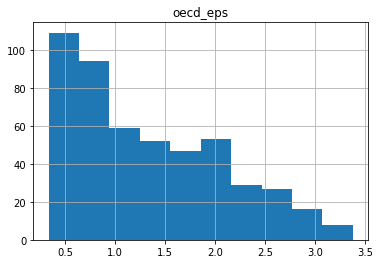

In [92]:
# Histrogram and skewness 
cl_wm.hist(column='oecd_eps')
print("Skewness oecd_eps: ")
print(cl_wm['oecd_eps'].skew())

Data are almost symetric, we have a postive skewness of 0,63 which is acceptable. We do not need to do a log transoformation for this variable

In [93]:
# Spatial Distribution 

cl_map = cl_wm.groupby(['country']).mean()
cl_map.reset_index(inplace=True)
cl_map = cl_map.rename(columns = {'index':'country'})
fig = px.choropleth(cl_map, locations='country',
                    locationmode='country names',
                    color='oecd_eps', 
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

It seems that the index is higher for european countries and north american ones. This may confirm our doubt since democraties have higher GDP than autocraties which implies that the strigency index, in mean, will be higher for democraties.

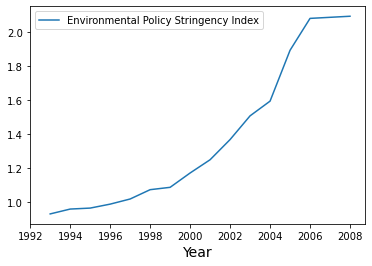

In [94]:
#Distribution over time

df_line = cl_wm.groupby(['year']).mean()
df_line.reset_index(inplace=True)
df_line = df_line.rename(columns = {'index':'country'})
plt.plot(df_line['year'], df_line['oecd_eps'], label = "Environmental Policy Stringency Index")
plt.xlabel('Year', fontsize=14)
plt.xticks(np.arange(1992, 2010, 2))
plt.legend()
plt.show()

The trend is clearly positive, governments are taking more regulations since climate change is a global issue that is more and more taken into account.

### Explanatory variable : Democracy


Polity 2 is a categorical variable that measures the type of policies of countries. It goes from -10 (autocracy) to 10 (democracy). 

In [95]:
cl_wm['polity2'].describe()

count    494.000000
mean       8.576923
std        3.571517
min       -7.000000
25%        9.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: polity2, dtype: float64

We can see that the median is equal to 10 which is also the maximum value. As a reminder, polty2=10 means that the country is a perfect democraty. Our distribution is not proportionaly distributed. This may be linked to the dataframe that we selected wich was dependant of the Environmental Policy Stringency Index variable that is available only for OECD country and most of which are european and thus democraties. 

Skewness polity2: 
-3.565941375914879


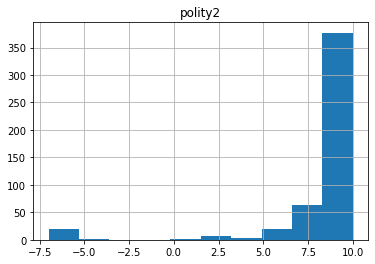

In [96]:
# Histrogram and skewness 
cl_wm.hist(column='polity2',bins=10)
print("Skewness polity2: ")
print(cl_wm['polity2'].skew())

The skewness is equal to -3,56. We can see that there is a big asymetry on the left with a density of very high values. This histogram permits us to visualise what we said before.

In [97]:
cl_wm1.polity2.unique()

array([10.,  8., -7.,  9., -5.,  6.,  0.,  4.,  3.,  7.])

In [98]:
#Spatial distribution
cl_map = cl_wm.groupby(['country']).mean()
cl_map.reset_index(inplace=True)
cl_map = cl_map.rename(columns = {'index':'country'})
fig = px.choropleth(cl_map, locations='country',
                    locationmode='country names',
                    color='polity2', 
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

The map confirms what we just said. European countries, Australia and North american ones are democraties. We have only a few autocraties, which will complicate our study since the samples are not normally distributed. 

### Additional explanatory variable : Number of NGOs


engo_nengo is a continuous variable that takes values between 0 and 60 with a mean equal to 10,84

In [99]:
cl_wm['engo_nengo'].describe()

count    494.000000
mean      10.842105
std       10.979945
min        0.000000
25%        3.000000
50%        6.500000
75%       15.000000
max       60.000000
Name: engo_nengo, dtype: float64

Skewness oecd_eps: 
1.7922279346055234


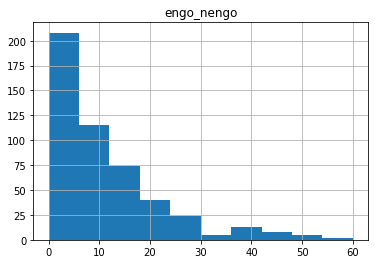

In [100]:
# Histrogram and skewness 
cl_wm.hist(column ='engo_nengo')
print("Skewness oecd_eps: ")
print(cl_wm['engo_nengo'].skew())

The data are positively skewed with a skewness of 1,79. We will not log-transform the data because the asymmetry is ‘acceptable’ (inferior to 3)

In [101]:
#Spatial distribution
cl_map = cl_wm.groupby(['country']).mean()
cl_map.reset_index(inplace=True)
cl_map = cl_map.rename(columns = {'index':'country'})
fig = px.choropleth(cl_map, locations='country',
                    locationmode='country names',
                    color='engo_nengo', 
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

The map shows us that democraties (USA, Australia, France...) have more NGOs than countries with a low score for polity2 (Russia, China, Indonesia...). The number of NGOs may be collerated with the type of policy and thus have an impact on the regulations related to climate change taken by countries.

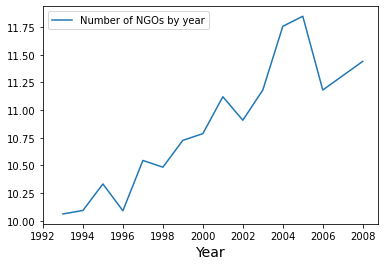

In [102]:
#Distribution over time

df_line = cl_wm.groupby(['year']).mean()
df_line.reset_index(inplace=True)
df_line = df_line.rename(columns = {'index':'country'})
plt.plot(df_line['year'], df_line['engo_nengo'], label = "Number of NGOs by year")
plt.xlabel('Year', fontsize=14)
plt.xticks(np.arange(1992, 2010, 2))
plt.legend()
plt.show()

We can see that the curve is not smooth but even so, the trend is postive : number of NGOs increases over time and it should be correlated with climate change issues that also increase over time.

### Question 12: Cooking the ingredients together (bivariate analysis) <a class="anchor" id="question12"></a>

Considering the "nature" of your variables (continuous, categorical, binary, etc.), pick the right tool / tools for a preliminary bivariate analysis, i.e. correlation tables, bar/line graphs, scatter plots, etc. Use these tools to describe your preliminary bivariate analysis and your findings. **(3 points)**

Answer 12:

Text(0, 0.5, 'Environmental Policy Stringency Index')

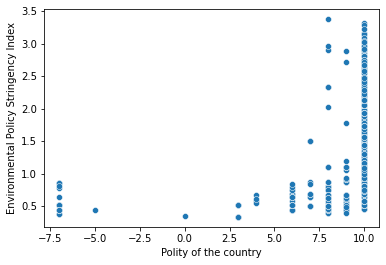

In [103]:
# Answer 12: 

sns.scatterplot(x='polity2', y='oecd_eps', data=cl_wm)
plt.xlabel('Polity of the country')
plt.ylabel('Environmental Policy Stringency Index')

We do a simple scatter plot. We can confirm that we have much more data available for countries with high score in polity2 (democracies). We also see that countries with high environmental policy stringency index are the democracies but it is not really viewable

To simplify the study i will divide the variable polity2 into three categories and give the values 1,2,3 for each by creating the variable cat_polity2: 

if polity2 <= 3 then cat_polity2 = 1

if 3 < polity2 < 8 then cat_polity2 = 2

else polity2 = 3 

In [104]:
conditionlist = [
    (cl_wm1['polity2'] <= 3) ,
    (cl_wm1['polity2'] >= 4) & (cl_wm1['polity2'] <8),
    (cl_wm1['polity2'] >= 8)]
choicelist = [1, 2, 3]
cl_wm1['cat_polity2'] = np.select(conditionlist, choicelist, default='Not Specified')

/var/folders/cc/czpkhzl97cs9wqllnm6rjkrh0000gn/T/ipykernel_2661/2173165373.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
cl_wm1['cat_polity2'] = cl_wm1['cat_polity2'].apply(int)

# We check that we have a new dataframe with cat_polity2 variable in it.
cl_wm1[cl_wm1['cat_polity2'] == 3]

/var/folders/cc/czpkhzl97cs9wqllnm6rjkrh0000gn/T/ipykernel_2661/3655383885.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso3,country,year,oecd_eps,polity2,engo_nengo,cat_polity2
647,AUS,Australia,1993,0.750000,10.0,31.0,3
648,AUS,Australia,1994,0.500000,10.0,32.0,3
649,AUS,Australia,1995,0.500000,10.0,32.0,3
650,AUS,Australia,1996,0.458333,10.0,28.0,3
651,AUS,Australia,1997,0.458333,10.0,28.0,3
...,...,...,...,...,...,...,...
14216,USA,United States of America,2003,1.300000,10.0,45.0,3
14217,USA,United States of America,2004,1.050000,10.0,47.0,3
14218,USA,United States of America,2005,1.091667,10.0,48.0,3
14219,USA,United States of America,2006,2.133333,10.0,47.0,3


Text(0, 0.5, 'Environmental Policy Stringency Index')

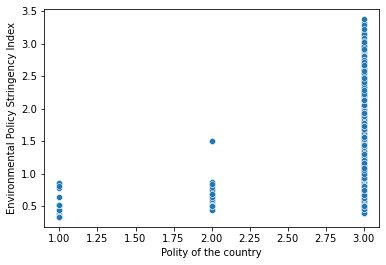

In [106]:
#Simple scatter plot
sns.scatterplot(x='cat_polity2', y='oecd_eps', data=cl_wm1)
plt.xlabel('Polity of the country')
plt.ylabel('Environmental Policy Stringency Index')

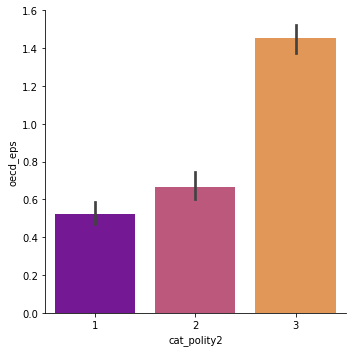

In [107]:
sns.catplot(x='cat_polity2', y='oecd_eps', hue='cat_polity2', palette="plasma", kind='bar',  dodge=False, data=cl_wm1)

For our data, we can see that a catplot is much more adapted than a scatter plot. Indeed, we can observe that the environmental strigency index increases in average with the type of policy (lower for autocraties and higher for democraties). However we cannot conclude causality due to the difference in sample sizes. Indeed, we have many more observations for democracies than for autocracies.But we can say that both variables are positively correlated.

In [108]:
cl_wm1[['polity2', 'oecd_eps']].corr()

,polity2,oecd_eps
polity2,1.000000,0.372214
oecd_eps,0.372214,1.000000


Both variables are indeed positively correlated.

Text(0, 0.5, 'Environmental Policy Stringency Index')

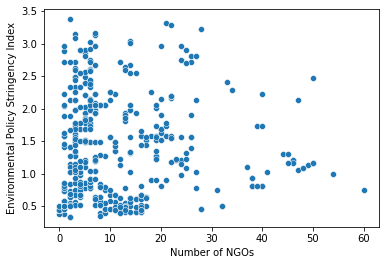

In [110]:
sns.scatterplot(x='engo_nengo', y='oecd_eps', data=cl_wm1)
plt.xlabel('Number of NGOs')
plt.ylabel('Environmental Policy Stringency Index')

Visually, the relationship between the number of NGOs and the envrionmental policy strigency index is unclear.

First, let's see if the type of polity and the number of NGOs are positively correlated.

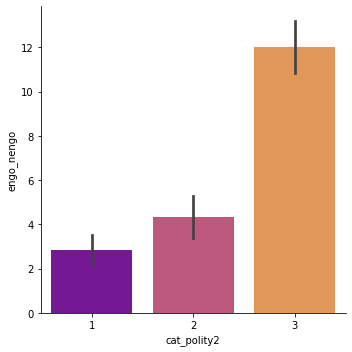

In [114]:
sns.catplot(x='cat_polity2', y='engo_nengo', hue='cat_polity2', palette="plasma", kind='bar',  dodge=False, data=cl_wm1)

It seems to be the case, but another time, this information should be treated with caution because of the number of observation for the third category (democraties)

The mean of the number of NGOs is 10,84, let's analyse the envrionmental policy strigency index for democraties that has less NGOs than the mean 

In [117]:
df_new = cl_wm1[(cl_wm1['engo_nengo'] < 10) & (cl_wm1['cat_polity2']==3)]
df_new.oecd_eps.describe()

count    232.000000
mean       1.538578
std        0.742879
min        0.395833
25%        0.875000
50%        1.479167
75%        2.062500
max        3.375000
Name: oecd_eps, dtype: float64

In [119]:
df_new2 = cl_wm1[(cl_wm1['engo_nengo'] > 10) & (cl_wm1['cat_polity2']==3)]
df_new2.oecd_eps.describe()

count    183.000000
mean       1.341234
std        0.754523
min        0.395833
25%        0.645833
50%        1.229167
75%        1.795833
max        3.312500
Name: oecd_eps, dtype: float64

We can see that the index for democraties with lower number of NGOs is in average higher than democraties with high number of NGOs which is counter intuitive and does not hold with my asumption.

### Question 13: Tasting the new recipe (conclusion) <a class="anchor" id="question13"></a>

Explain what you learned, the problem faced, what would you do next (you can suggest other data you would like to have etc). **(2 points)**

Answer 13: 
Throught this exercice, I principally learned that data is never available in the form we want it (number of observations, outliers, type of the variables, duplicates...) and i know understand what is usualy said that data scientist spend most of their time cleaning their data.

The main problem that I faced is the lack of observations for the Environmental Policy Stringency Index variable. Having observations only for OECD countries does not give a sample that is really representative of the "population" i.e. countries with different types of polycies. Since most of OECD countries are democraties, this complicated my study and thus the answering to my research question : Do democracies have more environmental regulations than autocracies?

So to really answer this question, I would suggest to find data about envrionmental regulations for countries that are "less" democratic than europe (from Africa, Asia, South-America...)

With more observations for different types of countries, I would also more understand of NGOs on countries regulations because the effect is really unclear with the actual data we have 